In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

path = '../figure_panels/potency_of_'
fs = 14 # fontsize

# Helper functions

In [2]:
# expect data in format concs, sa_rep1, sa_rep2, mrsa_rep1, mrsa_rep2, safbs_rep1, safbs_rep2, mrsafbs_rep1, mrsafbs_rep2, hep_rep1, hep_rep2, hek_rep1, hek_rep2
def plot_data(data, i, path, title, remove_highest_conc_from_bacterial = False):
    concs = data[0]
    sa_rep1 = data[1]
    sa_rep2 = data[2]
    mrsa_rep1 = data[3]
    mrsa_rep2 = data[4]
    safbs_rep1 = data[5]
    safbs_rep2 = data[6]
    mrsafbs_rep1 = data[7]
    mrsafbs_rep2 = data[8]
    hep_rep1 = data[9]
    hep_rep2 = data[10]
    hek_rep1 = data[11]
    hek_rep2 = data[12]

    sa_data = pd.DataFrame(zip(sa_rep1.iloc[:,i], sa_rep2.iloc[:,i]))
    mrsa_data = pd.DataFrame(zip(mrsa_rep1.iloc[:,i], mrsa_rep2.iloc[:,i]))
    safbs_data = pd.DataFrame(zip(safbs_rep1.iloc[:,i], safbs_rep2.iloc[:,i]))
    mrsafbs_data = pd.DataFrame(zip(mrsafbs_rep1.iloc[:,i], mrsafbs_rep2.iloc[:,i]))
    
    if remove_highest_conc_from_bacterial:
        # remove highest concentration b/c compound precipitates - sometimes happens
        sa_data = sa_data.iloc[1:len(sa_data),:]
        mrsa_data = mrsa_data.iloc[1:len(mrsa_data),:]
        safbs_data = safbs_data.iloc[1:len(safbs_data),:]
        mrsafbs_data = mrsafbs_data.iloc[1:len(mrsafbs_data),:]
        bact_concs = concs[1:len(concs)]
    else:
        bact_concs = concs
    
    hep_data = pd.DataFrame(zip(hep_rep1.iloc[:,i], hep_rep2.iloc[:,i]))
    hek_data = pd.DataFrame(zip(hek_rep1.iloc[:,i], hek_rep2.iloc[:,i]))

    fig, ax1 = plt.subplots(figsize = (6,5), dpi = 300)
    ax2 = ax1.twinx()
    plt.errorbar(bact_concs, np.mean(sa_data, axis = 1), yerr = sp.sem(sa_data, axis = 1), alpha = 0.5, marker = '^', linestyle = '-', color = 'black', label = 'SA', capsize = 2)
    plt.errorbar(bact_concs, np.mean(safbs_data, axis = 1), yerr = sp.sem(safbs_data, axis = 1), alpha = 0.5, marker = 'v', linestyle = '--', color = 'darkgrey', label = 'SA+FBS', capsize = 2)
    plt.errorbar(bact_concs, np.mean(mrsa_data, axis = 1), yerr = sp.sem(mrsa_data, axis = 1), alpha = 0.5, marker = '^', linestyle = '-', color = 'blue', label = 'MRSA', capsize = 2)
    plt.errorbar(bact_concs, np.mean(mrsafbs_data, axis = 1), yerr = sp.sem(mrsafbs_data, axis = 1), alpha = 0.5, marker = 'v', linestyle = '--', color = 'cornflowerblue', label = 'MRSA+FBS', capsize = 2)
    plt.errorbar(concs, np.mean(hep_data, axis = 1), yerr = sp.sem(hep_data, axis = 1), alpha = 0.5, marker = '.', linestyle = '-', color = 'forestgreen', label = 'HEP', capsize = 2)
    plt.errorbar(concs, np.mean(hek_data, axis = 1), yerr = sp.sem(hek_data, axis = 1), alpha = 0.5, marker = '.', linestyle = '--', color = 'seagreen', label = 'HEK', capsize = 2)
    
    ax1.set_xlabel('Concentration (ug/mL)', fontsize = fs)
    plt.xscale('log')
    ax1.set_ylabel('Relative Bacterial Growth', fontsize = fs)
    ax2.set_ylabel('Relative Mammalian Growth', fontsize = fs, color = 'forestgreen', rotation = 270, labelpad=12)
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.title(title, fontsize = fs) #  + '\n' + cpd_smiles[i]
    plt.legend()
    plt.tight_layout()
    plt.savefig(path + title + '.png')
    plt.savefig(path + title + '.svg')
    plt.show()


# SA-2 Cpds

In [3]:
# hardcode the extraction of the ODs and HEP/HEK growth
rd2 = pd.read_excel('../data/experimental_validation/sa_rd2_addtnl.xlsx')

# first get names / labels
cpd_smiles = list(rd2.iloc[2,2:10])
cpd_names = list(rd2.iloc[3,2:10])
concs = list(rd2.iloc[5:13,1])

# get OD values - can't be programmatic because positions/concentrations change every time
sa_rep1 = rd2.iloc[5:13,2:10].reset_index(drop = True)
sa_rep2 = rd2.iloc[5:13,12:20].reset_index(drop = True)
mrsa_rep1 = rd2.iloc[17:25,2:10].reset_index(drop = True)
mrsa_rep2 = rd2.iloc[17:25,12:20].reset_index(drop = True)
safbs_rep1 = rd2.iloc[29:37,2:10].reset_index(drop = True)
safbs_rep2 = rd2.iloc[29:37,12:20].reset_index(drop = True)
mrsafbs_rep1 = rd2.iloc[41:49,2:10].reset_index(drop = True)
mrsafbs_rep2 = rd2.iloc[41:49,12:20].reset_index(drop = True)

# last get tox readings
hek_rep1 = rd2.iloc[54:62,2:10].reset_index(drop = True)
hek_rep1_dmso = list(rd2.iloc[59:62,10])
hek_rep1 = hek_rep1 / np.average(hek_rep1_dmso)

hek_rep2 = rd2.iloc[54:62,12:20].reset_index(drop = True)
hek_rep2_dmso = list(rd2.iloc[59:62,20])
hek_rep2 = hek_rep2 / np.average(hek_rep2_dmso)

hep_rep1 = rd2.iloc[65:73,2:10].reset_index(drop = True)
hep_rep1_dmso = list(rd2.iloc[70:73,10])
hep_rep1 = hep_rep1 / np.average(hep_rep1_dmso)

hep_rep2 = rd2.iloc[65:73,12:20].reset_index(drop = True)
hep_rep2_dmso = list(rd2.iloc[70:73,20])
hep_rep2 = hep_rep2 / np.average(hep_rep2_dmso)

# put data all together
data = [concs, sa_rep1, sa_rep2, mrsa_rep1, mrsa_rep2, safbs_rep1, safbs_rep2, mrsafbs_rep1, mrsafbs_rep2, hep_rep1, hep_rep2, hek_rep1, hek_rep2]

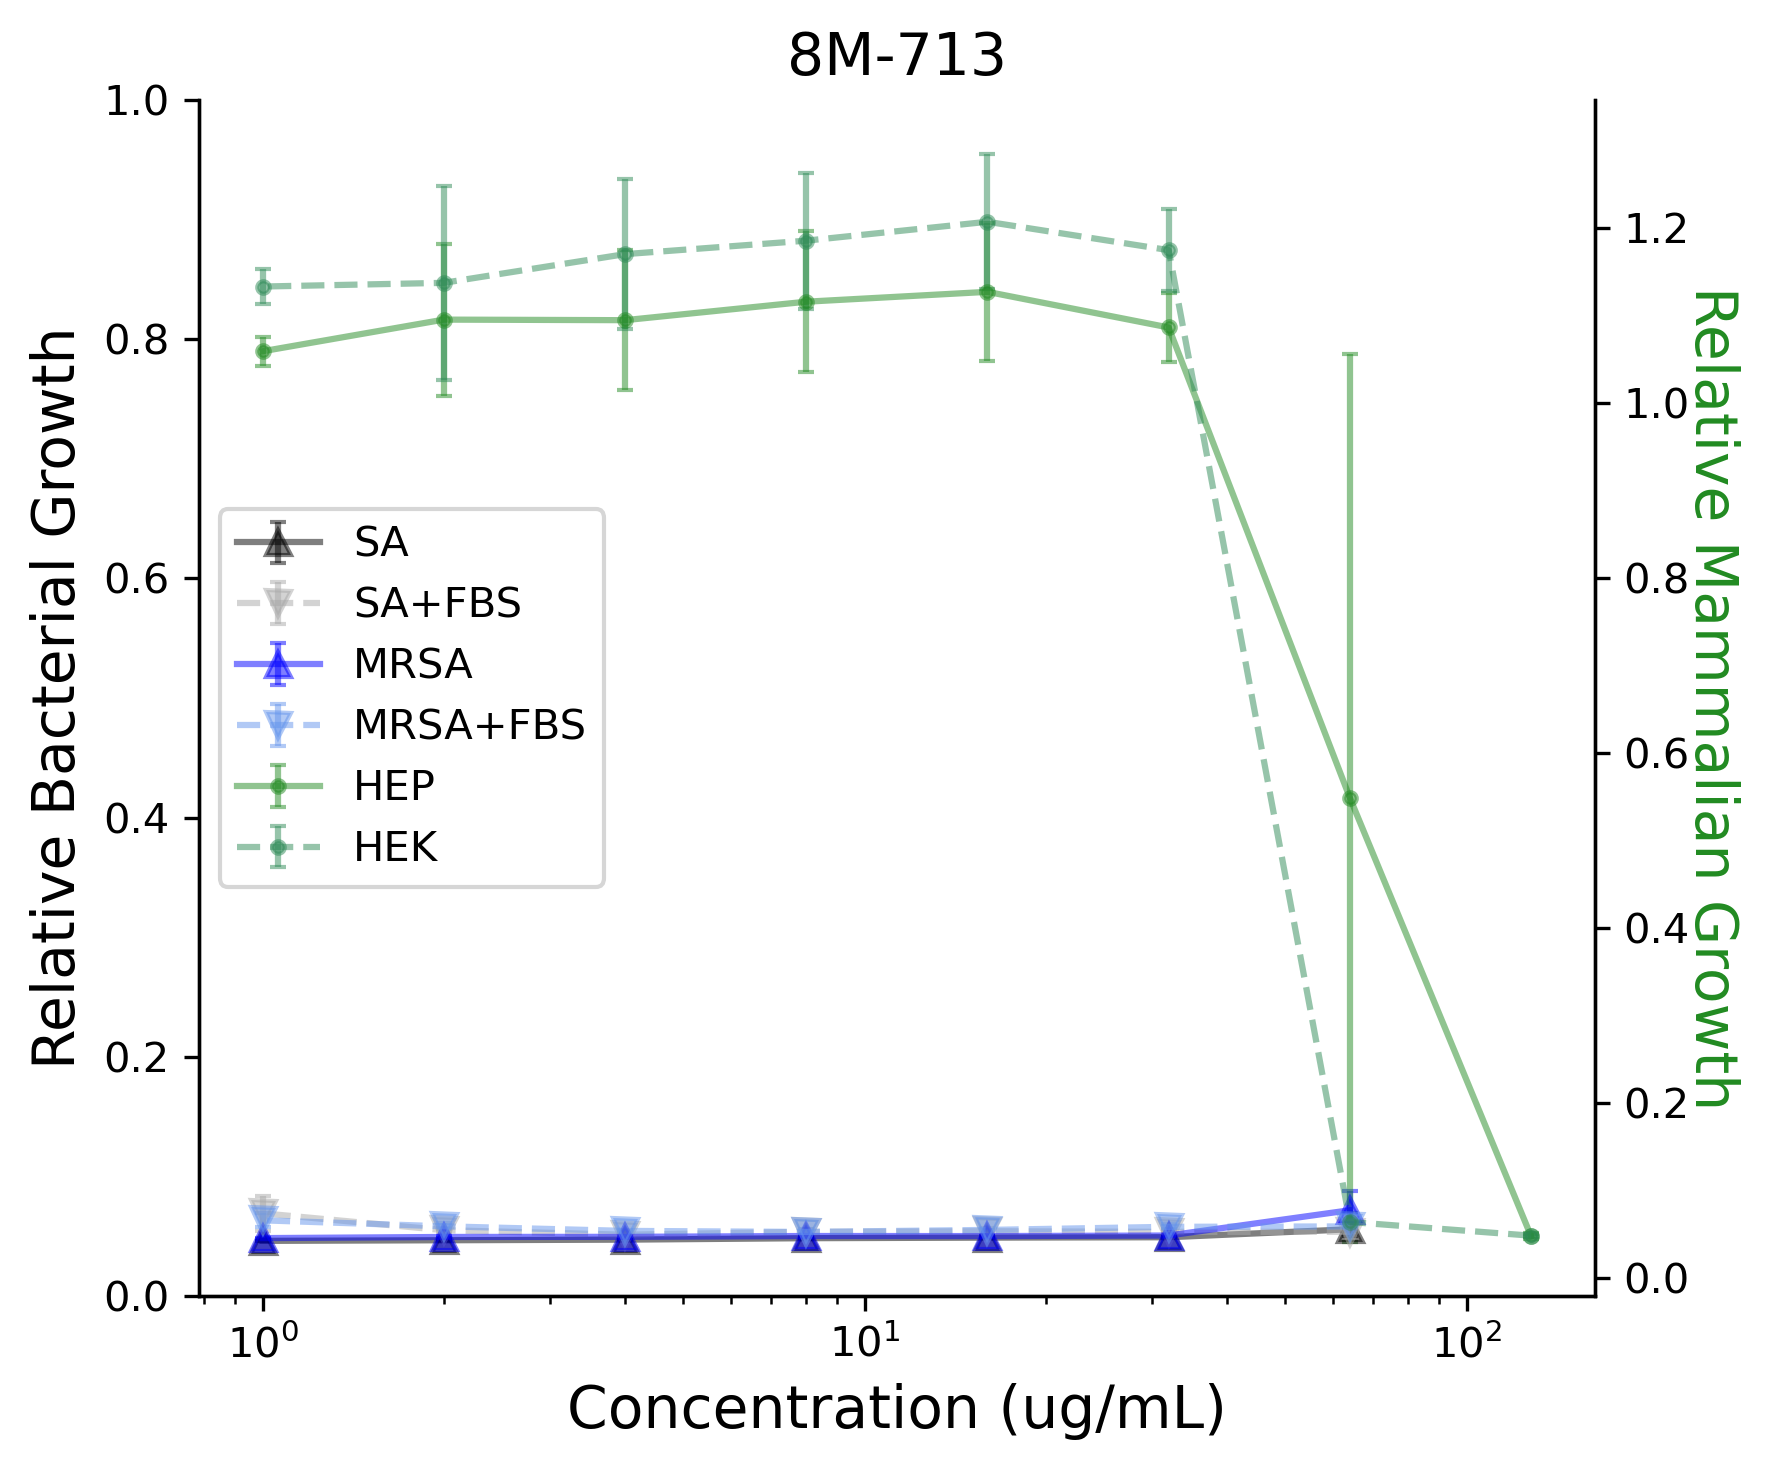

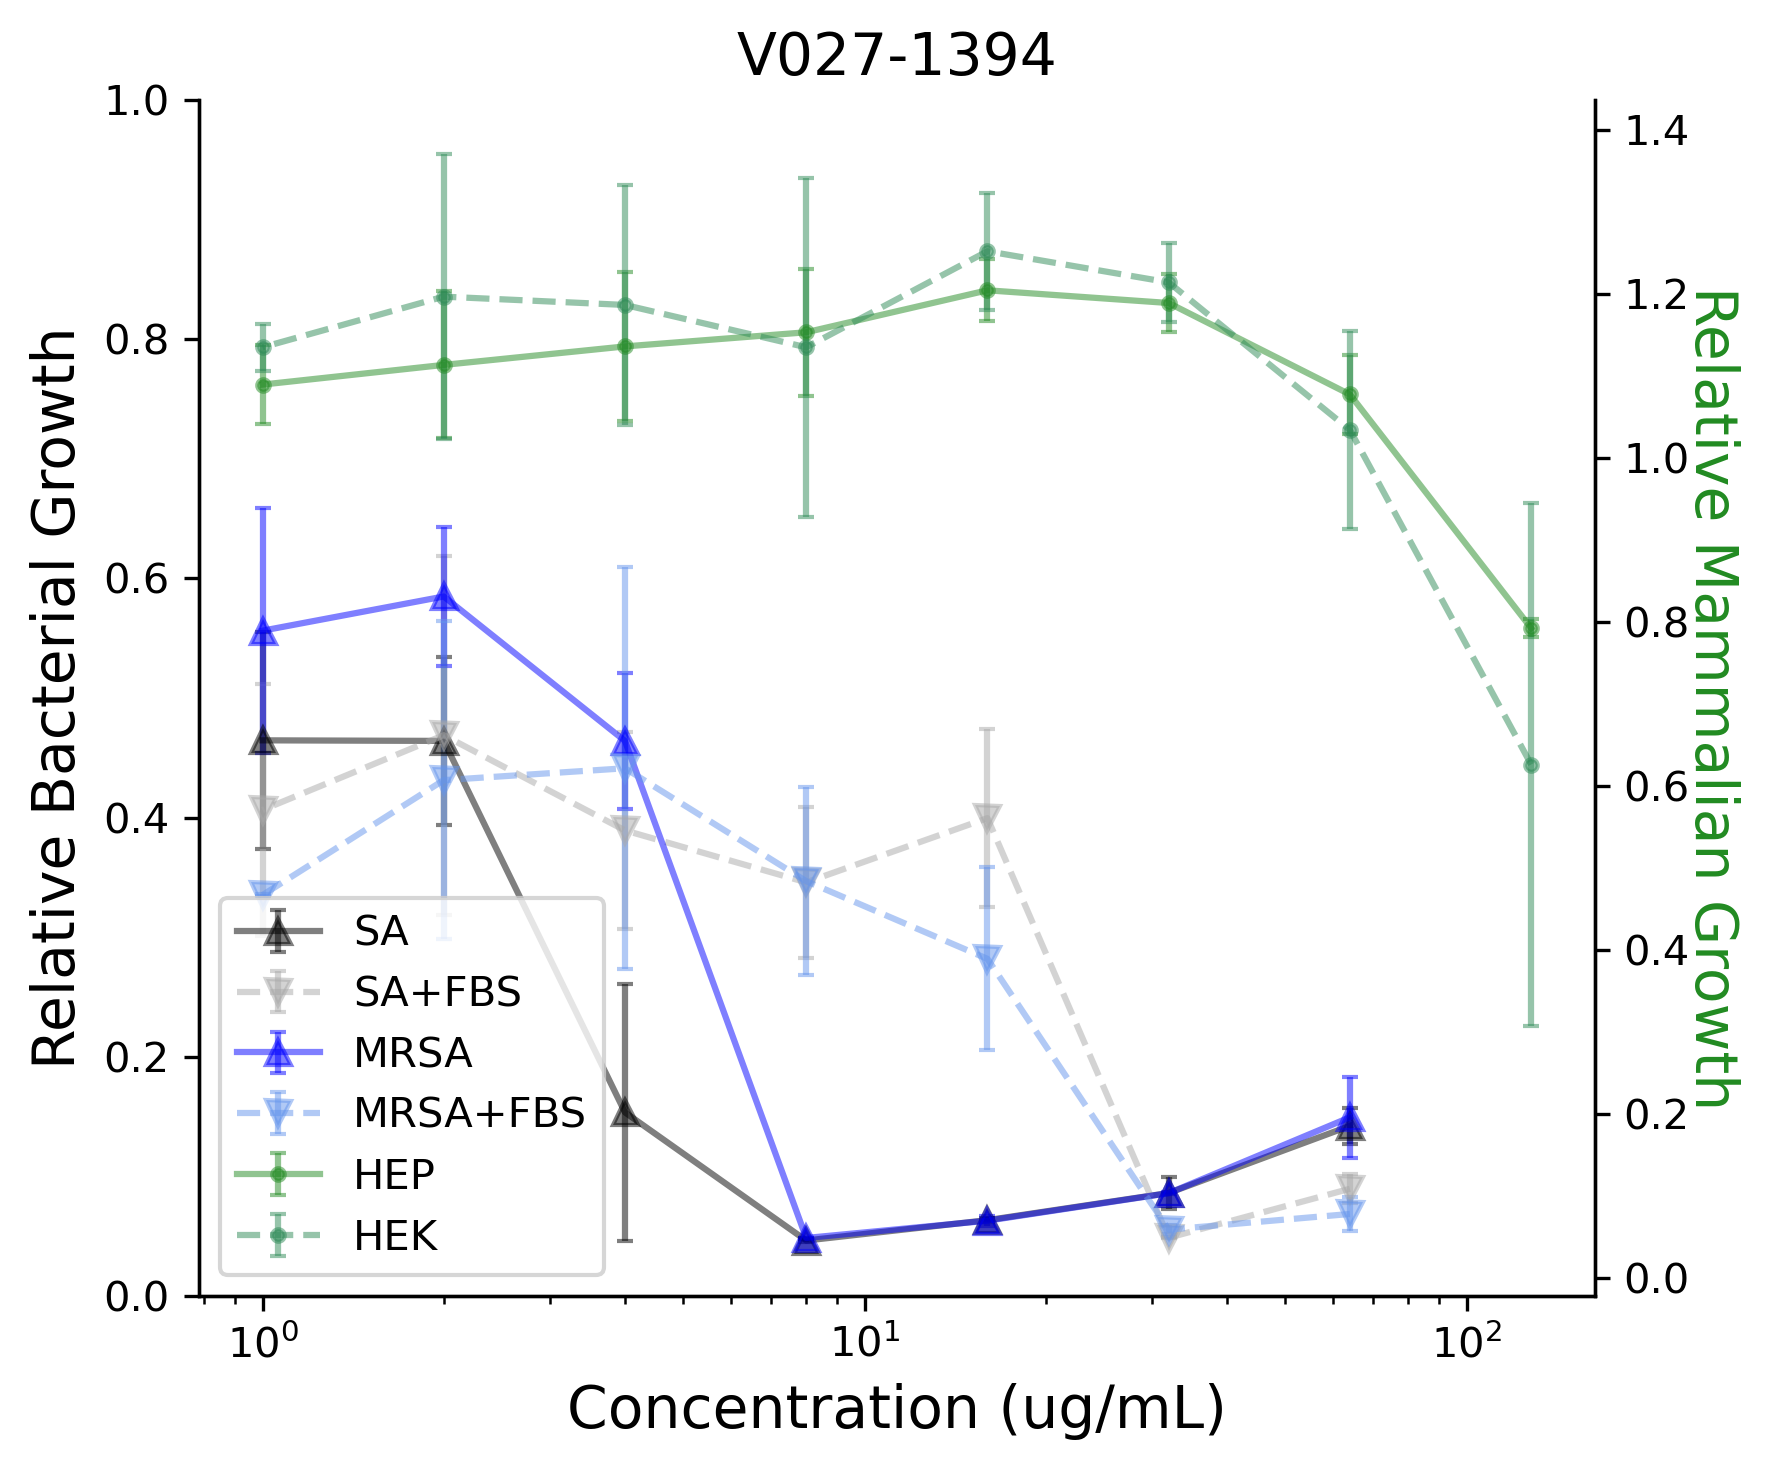

In [4]:
# now get the results for each cpd!
for i in range(0, 8):
    # just get 8M-713 and V027-0394
    if cpd_names[i] not in ['8M-713', 'V027-1394']:
        continue
    
    plot_data(data, i, path=path, title = cpd_names[i], remove_highest_conc_from_bacterial=True)
        

# SA-6 Cpds

In [5]:
# hardcode the extraction of the ODs and HEP/HEK growth
rd6 = pd.read_excel('../data/experimental_validation/sa_rd6.xlsx', sheet_name = 'MIC and Tox', header = 1)

# first get names / labels
cpd_smiles = list(rd6.iloc[0:6,3])
cpd_names = list(rd6.iloc[0:6,2])
concs = list(rd6.iloc[9:17,0])

# get OD values - can't be programmatic because positions/concentrations change every time
sa_rep1 = rd6.iloc[9:17,1:7].reset_index(drop = True)
sa_rep2 = rd6.iloc[9:17,8:14].reset_index(drop = True)
mrsa_rep1 = rd6.iloc[18:26,1:7].reset_index(drop = True)
mrsa_rep2 = rd6.iloc[18:26,8:14].reset_index(drop = True)
safbs_rep1 = rd6.iloc[28:36,1:7].reset_index(drop = True)
safbs_rep2 = rd6.iloc[28:36,8:14].reset_index(drop = True)
mrsafbs_rep1 = rd6.iloc[37:45,1:7].reset_index(drop = True)
mrsafbs_rep2 = rd6.iloc[37:45,8:14].reset_index(drop = True)

# last get tox readings
hek_rep1 = rd6.iloc[9:17,15:21].reset_index(drop = True)
hek_rep1_dmso = list(rd6.iloc[16,15:21]) # do not have dmso alone control so need to assume viability of 1 at lowest conc
hek_rep1 = hek_rep1 / np.average(hek_rep1_dmso)

hek_rep2 = rd6.iloc[9:17,22:28].reset_index(drop = True)
hek_rep2_dmso = list(rd6.iloc[16,22:28])
hek_rep2 = hek_rep2 / np.average(hek_rep2_dmso)

hep_rep1 = rd6.iloc[18:26,15:21].reset_index(drop = True)
hep_rep1_dmso = list(rd6.iloc[25,15:21])
hep_rep1 = hep_rep1 / np.average(hep_rep1_dmso)

hep_rep2 = rd6.iloc[18:26,22:28].reset_index(drop = True)
hep_rep2_dmso = list(rd6.iloc[25,22:28])
hep_rep2 = hep_rep2 / np.average(hep_rep2_dmso)

# put data all together
data = [concs, sa_rep1, sa_rep2, mrsa_rep1, mrsa_rep2, safbs_rep1, safbs_rep2, mrsafbs_rep1, mrsafbs_rep2, hep_rep1, hep_rep2, hek_rep1, hek_rep2]

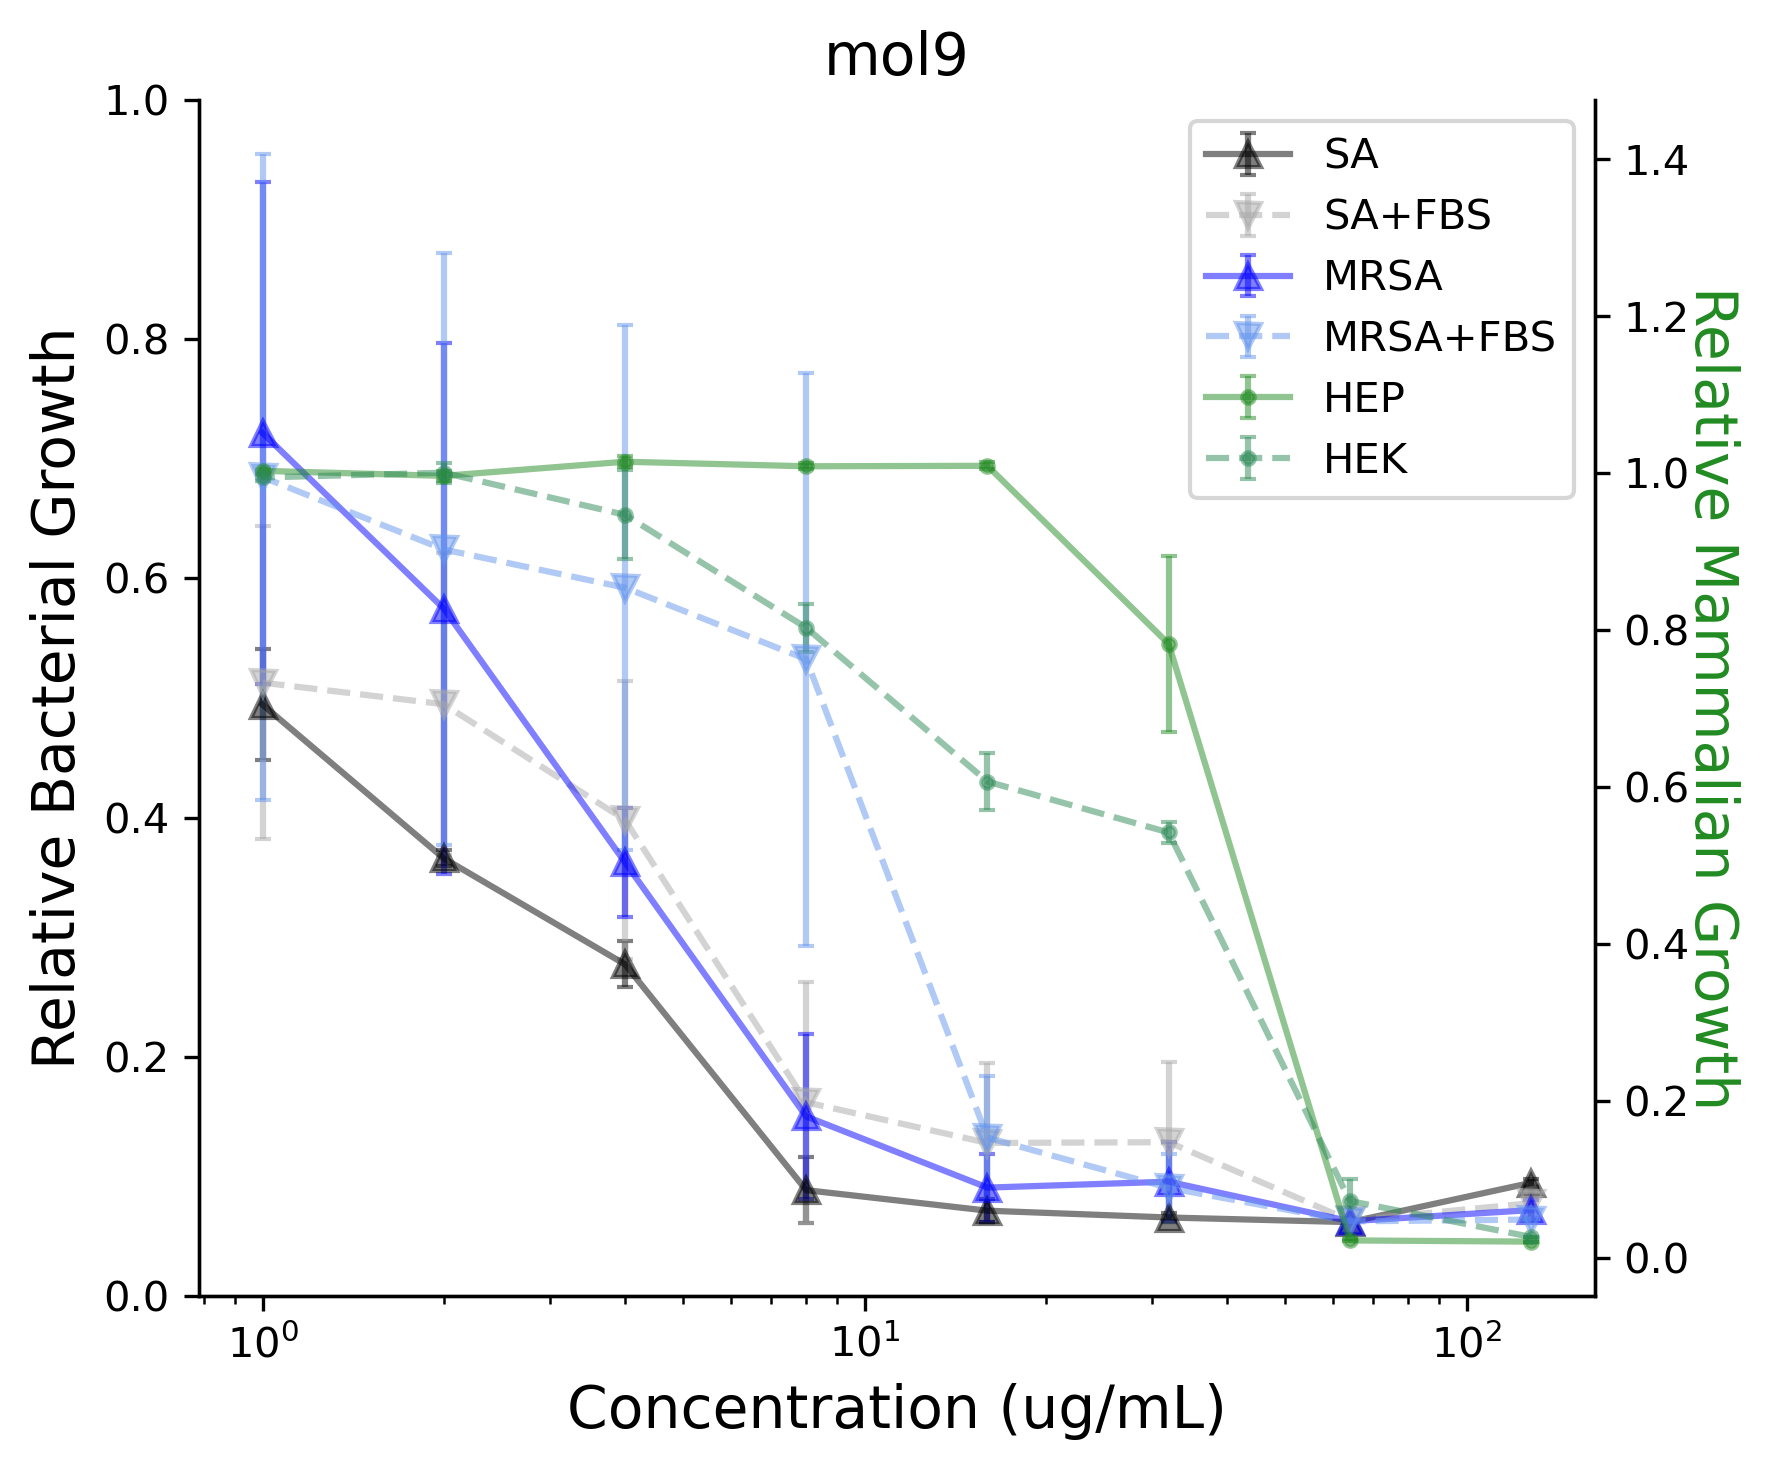

In [6]:
compounds = [1,9,17,26,29,31]
compounds = ['mol'+str(i) for i in compounds]
# now get the results for each cpd!
for i in range(len(compounds)):
    if compounds[i] not in ['mol9']:
        continue

    plot_data(data, i, path=path, title = compounds[i], remove_highest_conc_from_bacterial=False)
        

# NG-1 Cpds

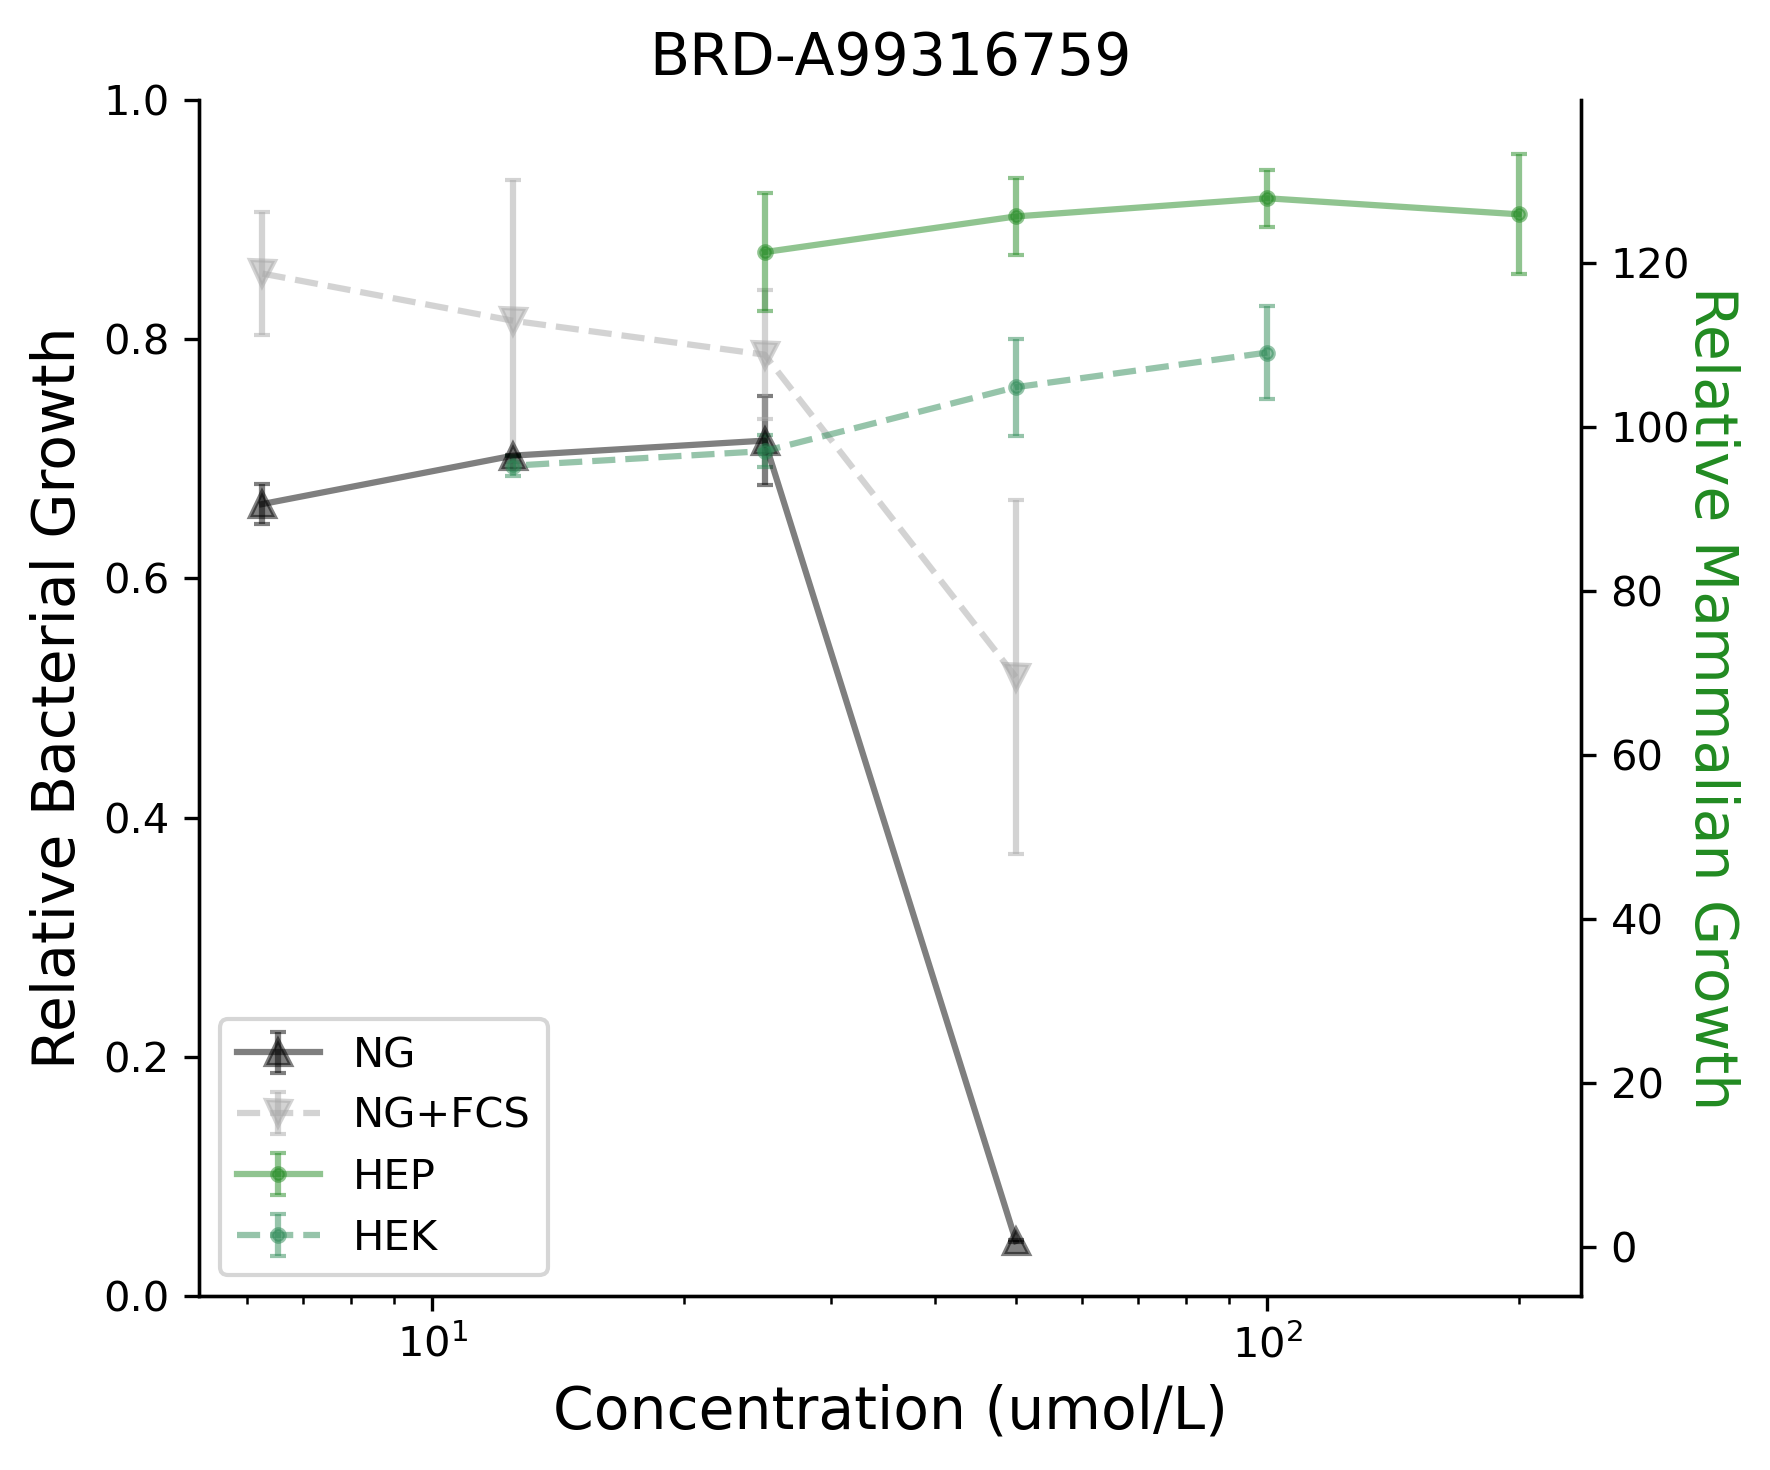

In [7]:
# hardcode the extraction of the ODs and HEP/HEK growth
ng1 = pd.read_excel('../data/experimental_validation/ng_rd1.xlsx', header = 1)
# this is such a wildly different format and I only need 1 cpd, so I will manually extract

# first get names / labels
title = 'BRD-A99316759'
bact_concs = [50,25,12.5,6.25]
hep_concs = [200,100,50,25]
hek_concs = [100,50,25,12.5]

# get OD values
rep1 = [0.776523518,103.7437866,96.53505863,88.10458302]
rep2 = [0.610256733,92.83060392,96.38295583,92.97787408]
fbs_rep1 = [47.86362926,100.8819513,95.72335399,111.1155791]
fbs_rep2 = [91.05697756,116.6627282,130.0763984,126.2151878]

# last get tox readings
hep_rep1 = [118.5776771,124.3733698,120.9732031,114.0835052]
hep_rep2 = [133.1889115,131.2985938,130.2668542,128.4556563]
hek_rep1 = [114.6477669,110.7059925,98.94806767,96.4435188]
hek_rep2 = [103.4008732,98.90125352,95.07069718,94.02289437]

data = [rep1,rep2]
fbs_data = [fbs_rep1, fbs_rep2]
hep_data = [hep_rep1, hep_rep2]
hek_data = [hek_rep1, hek_rep2]

fig, ax1 = plt.subplots(figsize = (6,5), dpi = 300)
ax2 = ax1.twinx()
plt.errorbar(bact_concs, np.mean(data, axis = 0), yerr = sp.sem(data, axis = 0), alpha = 0.5, marker = '^', linestyle = '-', color = 'black', label = 'NG', capsize = 2)
plt.errorbar(bact_concs, np.mean(fbs_data, axis = 0), yerr = sp.sem(fbs_data, axis = 0), alpha = 0.5, marker = 'v', linestyle = '--', color = 'darkgrey', label = 'NG+FCS', capsize = 2)
plt.errorbar(hep_concs, np.mean(hep_data, axis = 0), yerr = sp.sem(hep_data, axis = 0), alpha = 0.5, marker = '.', linestyle = '-', color = 'forestgreen', label = 'HEP', capsize = 2)
plt.errorbar(hek_concs, np.mean(hek_data, axis = 0), yerr = sp.sem(hek_data, axis = 0), alpha = 0.5, marker = '.', linestyle = '--', color = 'seagreen', label = 'HEK', capsize = 2)
    
ax1.set_xlabel('Concentration (umol/L)', fontsize = fs)
plt.xscale('log')
ax1.set_ylabel('Relative Bacterial Growth', fontsize = fs)
ax2.set_ylabel('Relative Mammalian Growth', fontsize = fs, color = 'forestgreen', rotation = 270, labelpad=12)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.title(title, fontsize = fs) #  + '\n' + cpd_smiles[i]
plt.legend()
plt.tight_layout()
plt.savefig(path + title + '.png')
plt.savefig(path + title + '.svg')
plt.show()